<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanCarlos_GarciaRendonMartinez/blob/main/Repaso_PCA_y_SVC_A01793708.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Prof. Titular: María de la Paz Rico Fernández
###Prof. Tutor: Bernardo Charles Canales

### **Semana 6: Repaso Transformación y reducción de dimensiones**

**Alumno**: Juan Carlos García Rendón Martinez           
**Matrícula**: A01793708

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=np.matmul(np.matmul(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
#Matriz 1
A = array([[3,0,2], [3,0,-2], [0,1,1]])         #Vamos a definir la matriz que solicita el ejercicio
print("-------Matriz original-------")
print(A)
print("-----------------------------")

values, vectors = np.linalg.eig(A)

W = vectors                                     #Tras aplicar la funcion de eigenvalores, asignamos nuestra matriz de vectores, su inversa y los eigenvalores
Winv = np.linalg.inv(W)
D = np.diag(values)
                                                
print("-------Matriz reconstruida-------")      
B=np.matmul(np.matmul(W,D),Winv)                #Realizamos la multiplicación usando este método de numpy, alternativamente pudimos haber definido objetos de matrices
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------


In [3]:
#Matriz 2
A2 = array([[1,3,8], [2,0,0], [0,0,1]])         #Vamos a definir la matriz que solicita el ejercicio
print("-------Matriz original-------")
print(A2)
print("-----------------------------")          
values, vectors = np.linalg.eig(A2)

W = vectors                                     #Tras aplicar la funcion de eigenvalores, asignamos nuestra matriz de vectores, su inversa y los eigenvalores
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B=np.matmul(np.matmul(W,D),Winv)                #Realizamos la multiplicación usando este método de numpy, alternativamente pudimos haber definido objetos de matrices
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


In [4]:
#Matriz 3
A3 = array([[5,4,0], [1,0,1], [10,7,1]])          #Vamos a definir la matriz que solicita el ejercicio
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

values, vectors = np.linalg.eig(A3)

W = vectors                                       #Tras aplicar la funcion de eigenvalores, asignamos nuestra matriz de vectores, su inversa y los eigenvalores
Winv = np.linalg.inv(W)
D = np.diag(values)

print("-------Matriz reconstruida-------")
B=np.matmul(np.matmul(W,D),Winv)                  #Realizamos la multiplicación usando este método de numpy, alternativamente pudimos haber definido objetos de matrices
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


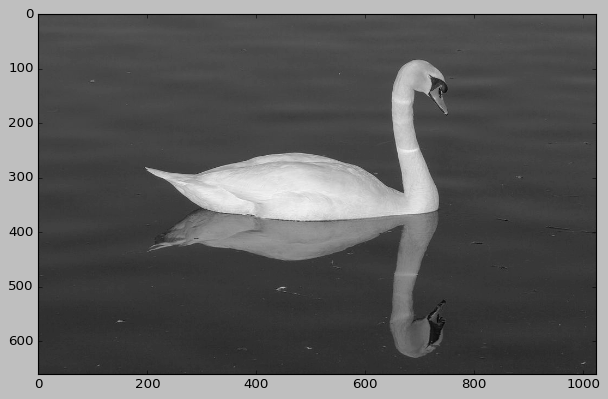

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB9CA7DC050>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

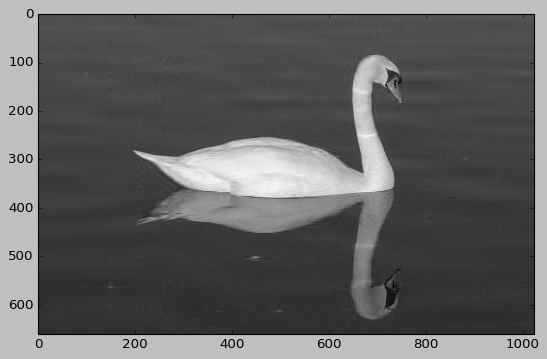

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

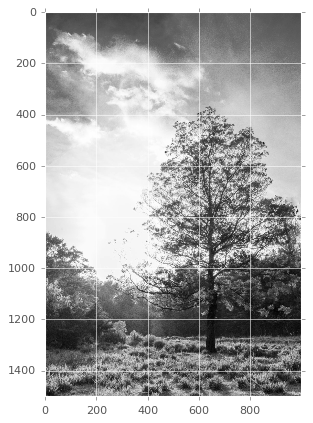

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x1500 at 0x7FB9AC895C90>


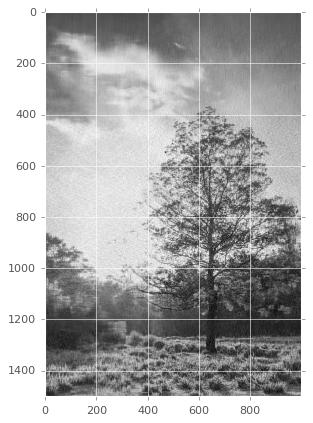

Felicidades la imagen está comprimida


In [32]:
#imagen 1
url = 'https://images.unsplash.com/photo-1501183007986-d0d080b147f9?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8ZnJlZXxlbnwwfHwwfHw%3D&w=1000&q=80'   #Mejor guardaremos cada URL en una variable

img = Image.open(urllib.request.urlopen(url))                 #Abrimos la liga y guardamos la imagen en una variable

imggray = img.convert('LA')                                   #Convertimos la imagen a grises con alpha y recuperamos su información en un arreglo
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))                                     #Graficamos, nuevamente indicamos que se muestre en grises
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
imgmat.shape

U,D,V = np.linalg.svd(imgmat)                                 #Aplicamos SVD a la imagen y recuperamos las diferentes matrices

nvalue = 100                                                  #Definimos la cantidad de componentes que queremos usar para volver a armar la matriz ya con un subconjunto de datos

reconstimg1 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])     #Aplicamos las oepraciones matriciales que aprendimos
plt.figure(figsize=(9,6))
plt.imshow(reconstimg1,cmap='gray')
plt.show()                                            #Graficamos el resultado después de las operaciones y obtenemos la imagen comprimida, donde visualmente es borrosa por la pérdida de componentes
print("Felicidades la imagen está comprimida")

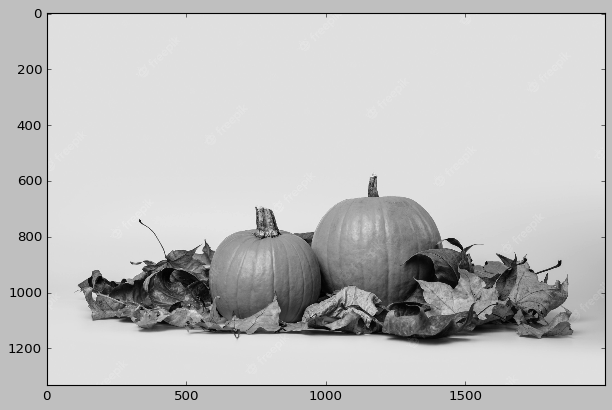

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x1330 at 0x7FB9C0975A50>


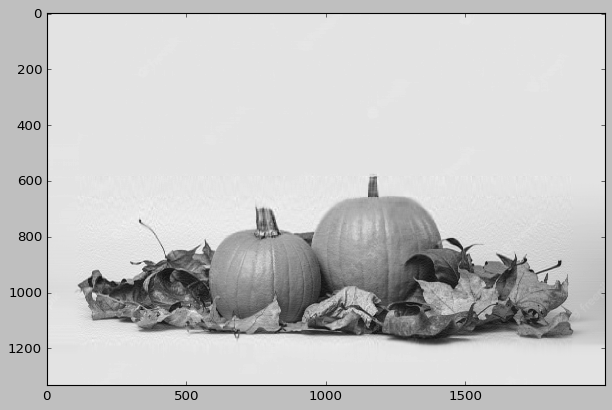

Felicidades la imagen está comprimida


In [24]:
##imagen 2
url = 'https://img.freepik.com/free-photo/pumpkins-decorated-with-dry-maple-leaves_181624-18933.jpg?w=2000'

img = Image.open(urllib.request.urlopen(url))

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
imgmat.shape

U,D,V = np.linalg.svd(imgmat)

nvalue = 80

reconstimg2 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

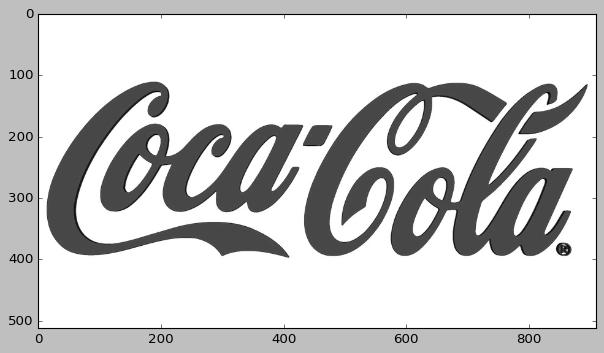

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=910x512 at 0x7FB9C0CFF5D0>


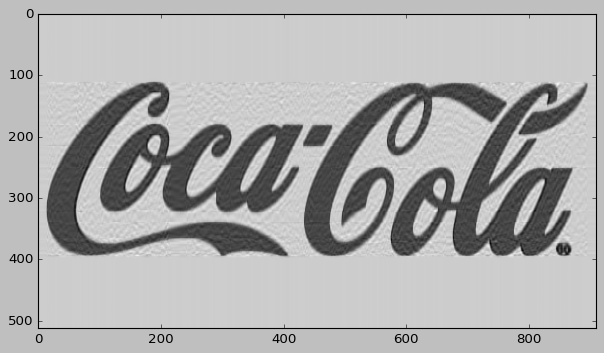

Felicidades la imagen está comprimida


In [25]:
#imagen 3
url = 'https://3dwarehouse.sketchup.com/warehouse/v1.0/content/public/35365036-86fd-4ad2-91ee-0b48e4fa152e'

img = Image.open(urllib.request.urlopen(url))

imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
imgmat.shape

U,D,V = np.linalg.svd(imgmat)

nvalue = 40

reconstimg3 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




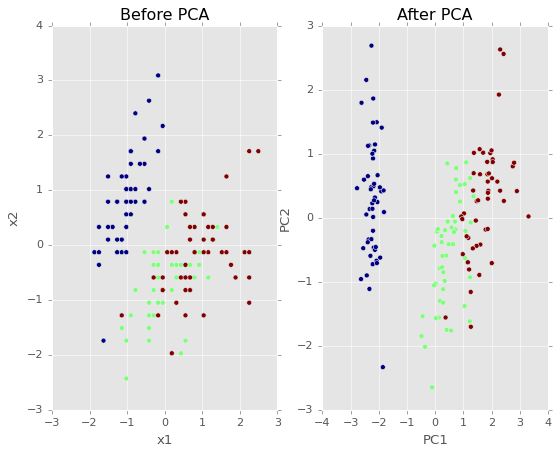

In [27]:
import numpy as np                                    #Cargamos librerias
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data                                       #Cargamos la cla´sica data de iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features                                #Estandarizamos la variables para poder aplicar PCA
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs       #Aplicamos el PCA considerando solo 2 componentes
X_new = pca.fit_transform(X) # project the original data into the PCA space

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()                                            #Tras graficar visualizamos como se movieron las observaciones y se muestran más ordenadas y con categorias más definidas

In [28]:
print(pca.explained_variance_ratio_)                        #Recuperamos del método las proporciones de variance por componente generado de PCA
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [31]:
print(np.cov(X_new.T))                                      #Al analizar estos 2 objetos diferentes, descubrimos que son los mismos, la diagonal de la inversa(transpuesta) de las X tras el PC vs la varianza del PCA
print(pca.explained_variance_)

[[2.93808505e+00 5.33928780e-16]
 [5.33928780e-16 9.20164904e-01]]
[2.93808505 0.9201649 ]


**Describe lo relevante del ejercicio y que descubriste de las variables análizadas. **

Lo más relevante del ejercicio fue el poder ver paso por paso y visualmente que es lo que sucedía con el PCA y la variables, para mi los 2 puntos que me ayudó a aclarar más fue el ver como desde el PCA es clarísimo observar la correlación entre las variables/features.

El otro punto fue que el ejemplo práctico me ayudo a entender las operaciones de las matrizces y como la varianza resulta ser la diagonal de la matriz inversa.

**Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.**

*¿Qué es feature importance y para que nos sirve?*
Son los mecanismos que nos permiten valorizar cada una de las variables/features que tenga nuestro problema. Al poderlas valorar podemos identificar cuáles son más importantes y aportan más a la explicación del modelo. Así se puede escoger un subconjunto de estas para analizar a profundidad, esto ayuda a generar un modelo más simple el cual muchas veces ayuda con la interpretación y a reducir los tiempos de computo.

***************************************************************

*¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?*
El hallazgo más importante para mi fue que después de realizar los procesos de PCA y descomposisión se puede reducir enermomente la dimensionalidad del problema, como en el caso de la compresión de imágenes que a pesar de tener miles miles de componentes, con 100 se podía obtener ya un buen resultado.

*********************************


*¿Dónde lo aplicarías o te sería de utilidad este conocimiento?*
Definitivamente cada vez que tengamos un gran número de variables a considerar previo a entrenar modelos, nos puede orientar sobre a que variables enfocarnos, lo aplicaria como parte del análisis de las variables para conocer mejor la información. También creo que uan vez que se tenga un modelo (que muchas veces son difíciles de explicar), nos podría orientar para poder indicar al menos qué variables son más significativas y tienen más peso en el modelo, así como indicar también las correlaciones. Estos ultimos 2 puntos suelen ser muy importantes a la hora de tomar decisiones empresariales.

*******************************

Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.

Importante: Entrega en Canvas tu documento en formato PDF /liga del notebook en colab incluyendo las partes de la actividad.